## Heart Disease Prediction 

### Importing Required Libraries

In [14]:
import numpy as np
import pandas as pd

from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve

import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import json

import warnings
warnings.filterwarnings('ignore')

import config

## 1.Problem Statment :

Predict the heart disease using following features:
1.age
2.sex
3.chest pain type (4 values)
4.resting blood pressure
5.serum cholestoral in mg/dl
6.fasting blood sugar > 120 mg/dl
7.resting electrocardiographic results (values 0,1,2)
8.maximum heart rate achieved
9.exercise induced angina
10.oldpeak = ST depression induced by exercise relative to rest
11.the slope of the peak exercise ST segment
12.number of major vessels (0-3) colored by flourosopy
13.thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
    

## 2. Data Gathering:

In [15]:
df = pd.read_csv(config.DATA)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [16]:
df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## 3. Exploratory Data Analysis

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [18]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Data Cleaning:

1. No missing values
2. All features have data type int

## 4. Feature Engineering:

### Check For Outliers

### 1. 'age'

<AxesSubplot:xlabel='age'>

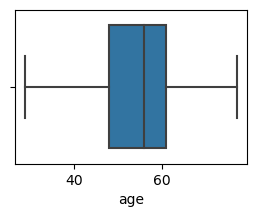

In [19]:
plt.figure(figsize=(3,2))
sns.boxplot(x= df['age'])

### 2.'trestbps'

<AxesSubplot:xlabel='trestbps'>

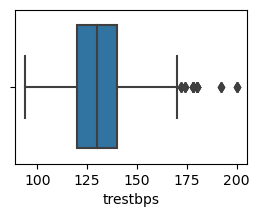

In [20]:
plt.figure(figsize=(3,2))
sns.boxplot(x= df['trestbps'])     # Outliers are present 

In [21]:
# Handling the outliers of trestbps feature
q1,q3 = np.quantile(df['trestbps'], [0.25,0.75])
iqr = q3-q1

upper_tail = q3 + 1.5*iqr
df['trestbps'] = np.where(df['trestbps'] >upper_tail, upper_tail, df['trestbps'] )

<AxesSubplot:xlabel='trestbps'>

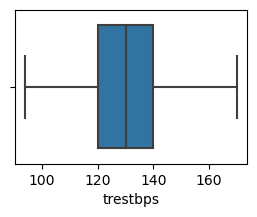

In [22]:
plt.figure(figsize=(3,2))
sns.boxplot(x= df['trestbps']) 

### 3. 'chol'

<AxesSubplot:xlabel='chol'>

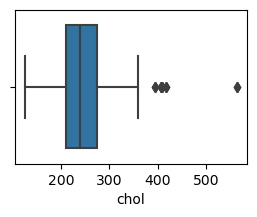

In [23]:
plt.figure(figsize=(3,2))
sns.boxplot(x= df['chol'])  
# print("Skew Value : ", df['chol'].skew())

In [24]:
# Handling the outliers of trestbps feature
q1,q3 = np.quantile(df['chol'], [0.25,0.75])
iqr = q3-q1

upper_tail = q3 + 1.5*iqr
df['chol'] = np.where(df['chol'] >upper_tail, upper_tail, df['chol'] )

<AxesSubplot:xlabel='chol'>

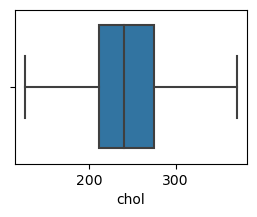

In [25]:
plt.figure(figsize=(3,2))
sns.boxplot(x= df['chol'])

### 4. 'thalach'

<AxesSubplot:xlabel='thalach'>

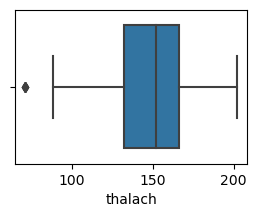

In [26]:
plt.figure(figsize=(3,2))
sns.boxplot(x= df['thalach'])

In [27]:
# Handling the outliers of trestbps feature
q1,q3 = np.quantile(df['thalach'], [0.25,0.75])
iqr = q3-q1

lower_tail = q1 - 1.5*iqr
df['thalach'] = np.where(df['thalach'] <lower_tail, lower_tail, df['thalach'] )

<AxesSubplot:xlabel='thalach'>

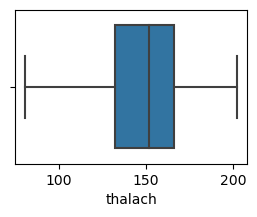

In [28]:
plt.figure(figsize=(3,2))
sns.boxplot(x= df['thalach'])

### 5.'oldpeak'

<AxesSubplot:xlabel='oldpeak'>

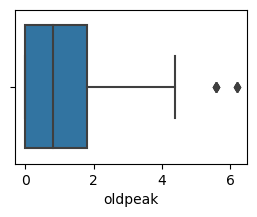

In [29]:
plt.figure(figsize=(3,2))
sns.boxplot(x= df['oldpeak'])

In [30]:
# Handling the outliers of trestbps feature
q1,q3 = np.quantile(df['oldpeak'], [0.25,0.75])
iqr = q3-q1

upper_tail = q3 + 1.5*iqr
df['oldpeak'] = np.where(df['oldpeak'] >upper_tail, upper_tail, df['oldpeak'] )

<AxesSubplot:xlabel='oldpeak'>

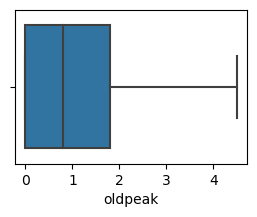

In [31]:
plt.figure(figsize=(3,2))
sns.boxplot(x= df['oldpeak'])

### Scaling:

In [32]:
x = df.drop("target", axis = 1)
y = df['target']

normal_scaler = MinMaxScaler()
array1 = normal_scaler.fit_transform(x)
dfx = pd.DataFrame(array1, columns= x.columns)

In [33]:
y.value_counts()  # Data is balanced

1    526
0    499
Name: target, dtype: int64

In [34]:
# dfx.head()

## 5. Model Training & Evaluation:

### 5.1 Logistic Regression

In [35]:
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(dfx,y, test_size=0.2, random_state=21, stratify=y )

In [36]:
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train, y_train)

LogisticRegression()

In [37]:
# Data Evaluation

train_score = logistic_reg.score(x_train, y_train)
print("Training Data Accuracy : ", train_score)

test_score = logistic_reg.score(x_test, y_test)
print("Testing Data Accuracy : ", test_score)

Training Data Accuracy :  0.8597560975609756
Testing Data Accuracy :  0.8390243902439024


### 5.2 KNN Regression

In [121]:
knn_reg = KNeighborsClassifier(n_neighbors=5, p = 2)
knn_reg.fit(x_train, y_train)

KNeighborsClassifier()

In [122]:
# Data Evaluation

train_score = knn_reg.score(x_train, y_train)
print("Training Data Accuracy : ", train_score)

test_score = knn_reg.score(x_test, y_test)
print("Testing Data Accuracy : ", test_score)

Training Data Accuracy :  0.9341463414634147
Testing Data Accuracy :  0.7902439024390244


### Hyperparameter Tunning  for KNN 

### 1. GideSerachCV

In [78]:
knn_reg = KNeighborsClassifier()

param_grid = {'n_neighbors' : np.arange(3,21), 
             'p' : [1,2]}

gscv = GridSearchCV(knn_reg, param_grid, cv = 8 )
gscv.fit(x_train, y_train)

GridSearchCV(cv=8, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20]),
                         'p': [1, 2]})

In [79]:
# gscv.best_estimator_

In [81]:
knn_reg_gs = gscv.best_estimator_
knn_reg_gs.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3, p=1)

In [109]:
# Data Evaluation

train_score = knn_reg_gs.score(x_train, y_train)
print("Training Data Accuracy : ", train_score)

test_score = knn_reg_gs.score(x_test, y_test)
print("Testing Data Accuracy : ", test_score) 

# Here variance is high (acceptable range +-5%)

Training Data Accuracy :  0.9926829268292683
Testing Data Accuracy :  0.9317073170731708


### 2. RandomizedSearchCV

In [110]:
knn_reg = KNeighborsClassifier()

param_dist = {'n_neighbors' : np.arange(3,21), 
             'p' : [1,2]}

rscv = RandomizedSearchCV(knn_reg, param_dist, cv = 8)
rscv.fit(x_train, y_train)

RandomizedSearchCV(cv=8, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20]),
                                        'p': [1, 2]})

In [111]:
knn_reg_rs = rscv.best_estimator_
knn_reg_rs.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7, p=1)

In [112]:
# Data Evaluation

train_score = knn_reg_rs.score(x_train, y_train)
print("Training Data Accuracy : ", train_score)

test_score = knn_reg_rs.score(x_test, y_test)
print("Testing Data Accuracy : ", test_score)

# Here variance is high (acceptable range +-5%)

Training Data Accuracy :  0.9109756097560976
Testing Data Accuracy :  0.824390243902439


### Using for loop find best value of p and K

In [113]:
train_acc_list = []
test_acc_list = []
k_value = np.arange(3,21)

for k in k_value:
    knn_clf = KNeighborsClassifier(k, p = 2)
    knn_clf.fit(x_train, y_train)
    
    train_acc = knn_clf.score(x_train, y_train)
    train_acc_list.append(train_acc)
    
    test_acc = knn_clf.score(x_test, y_test)
    test_acc_list.append(test_acc)


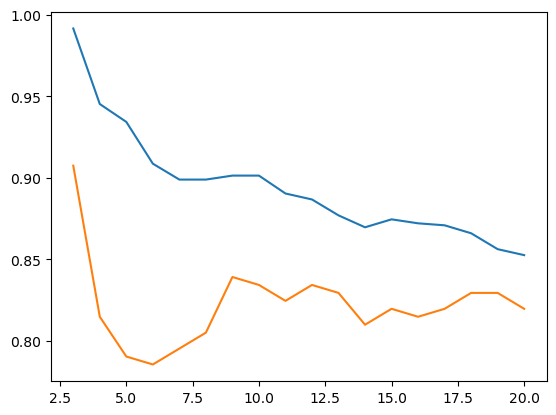

In [114]:
plt.plot(k_value, train_acc_list)
plt.plot(k_value, test_acc_list)   

In [117]:
knn_reg = KNeighborsClassifier(n_neighbors=19, p = 2)
knn_reg.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=19)

In [118]:
# Data Evaluation

train_score = knn_reg_rs.score(x_train, y_train)
print("Training Data Accuracy : ", train_score)

test_score = knn_reg_rs.score(x_test, y_test)
print("Testing Data Accuracy : ", test_score)

Training Data Accuracy :  0.9109756097560976
Testing Data Accuracy :  0.824390243902439
